In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('bodyPerformance.csv')

In [37]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [38]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [39]:
df.shape

(13393, 12)

In [40]:
df.info

<bound method DataFrame.info of         age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  

In [41]:
#checking the missing values
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB
None


In [43]:
SexColumnDummy = pd.get_dummies(df['gender'])

In [44]:
df = pd.concat((df, SexColumnDummy), axis=1)

In [45]:
df = df.drop(['gender'],axis=1)

In [46]:
df['class'] = df['class'].replace({"A" : 1,
                                       "B" : 2,
                                       "C" : 3,
                                       "D" : 4})

In [47]:
df.head()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,F,M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2,0,1


In [48]:
df.corr()['class']

age                        0.065612
height_cm                  0.037753
weight_kg                  0.214129
body fat_%                 0.341956
diastolic                  0.066761
systolic                   0.035484
gripForce                 -0.136088
sit and bend forward_cm   -0.588123
sit-ups counts            -0.452832
broad jump_cm             -0.262154
class                      1.000000
F                         -0.075605
M                          0.075605
Name: class, dtype: float64

<AxesSubplot:>

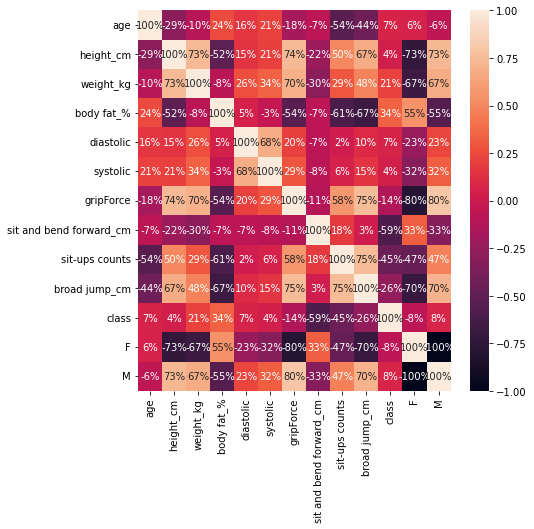

In [49]:
#correlation plot using my new dataframe
plt.figure(figsize=[7,7])
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

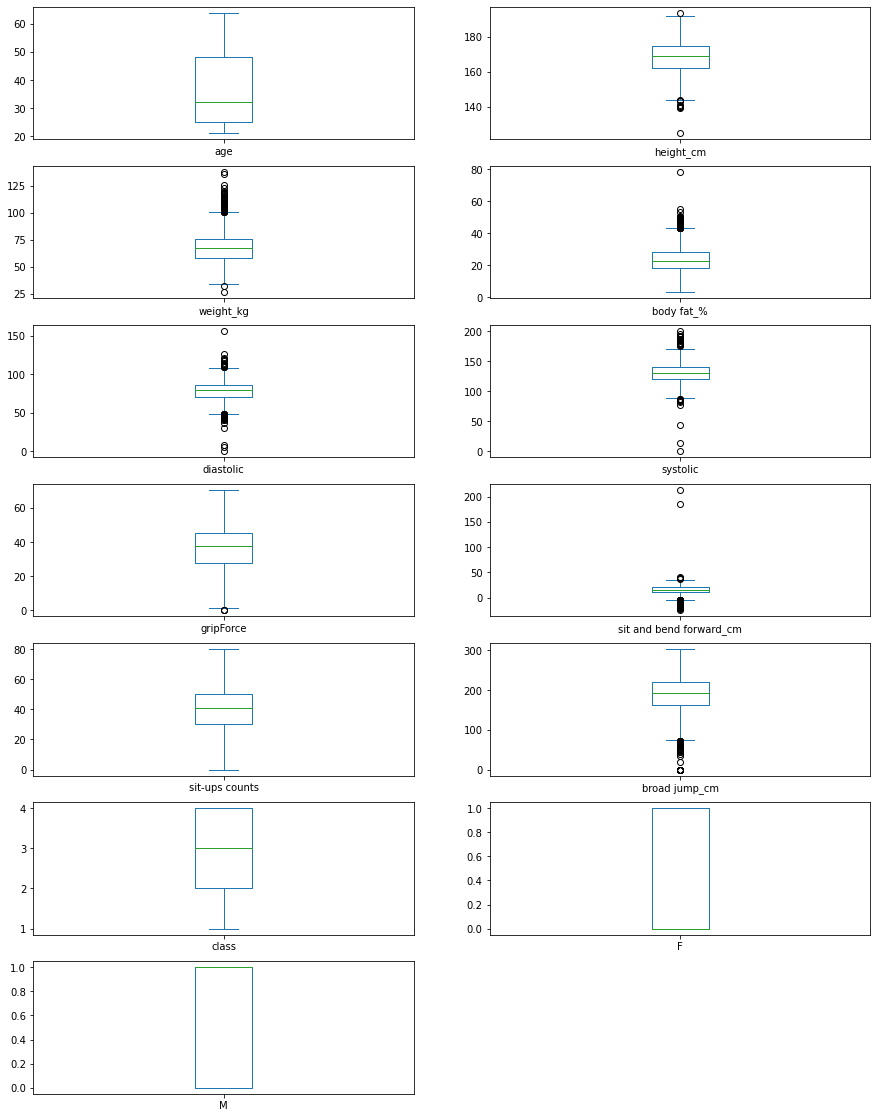

In [50]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

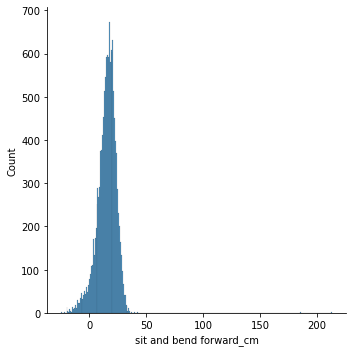

In [51]:
sns.displot(df['sit and bend forward_cm'])

In [52]:
q1 = df['sit and bend forward_cm'].quantile(0.25)
q3 = df['sit and bend forward_cm'].quantile(0.75)
iqr = q3-q1

In [53]:
q1,q3,iqr

(10.9, 20.7, 9.799999999999999)

In [54]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-3.799999999999999, 35.4)

In [55]:
#find the outliers
df.loc[(df['sit and bend forward_cm'] > upper_limit) | (df['sit and bend forward_cm'] < lower_limit)]

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,F,M
47,26.0,172.1,66.10,24.90000,62.0,102.0,19.9,-9.9,44.0,159.0,4,0,1
75,22.0,171.9,78.46,22.90000,64.0,116.0,43.6,-9.3,46.0,219.0,4,0,1
139,22.0,180.3,91.70,32.10000,75.0,134.0,28.6,-6.9,36.0,210.0,4,0,1
265,23.0,161.1,53.00,28.40000,72.0,116.0,28.9,-4.4,22.0,143.0,4,1,0
286,53.0,160.4,59.30,20.30000,57.0,102.0,22.5,-5.0,13.0,150.0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13280,26.0,173.5,68.70,15.16476,78.0,120.0,44.7,-8.6,50.0,200.0,4,0,1
13301,26.0,175.4,74.70,18.20000,93.0,150.0,37.7,-6.8,53.0,215.0,4,0,1
13318,25.0,187.9,94.90,19.40000,68.0,107.0,33.9,-8.7,26.0,221.0,4,0,1
13357,56.0,173.0,52.60,12.90000,92.0,141.0,32.6,-13.2,31.0,198.0,4,0,1


In [56]:
#trimming - delete the outlier data
new_df = df.loc[(df['sit and bend forward_cm'] < upper_limit) & (df['sit and bend forward_cm'] > lower_limit)]
print('before removing outliers:', len(df))
print('After removing outliers:', len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 13393
After removing outliers: 12984
outliers: 409


In [57]:
#capping - change the outlier to upper lower limit values
new_df = df.copy()
new_df.loc[(new_df['sit and bend forward_cm']>upper_limit),'sit and bend forward_cm'] = upper_limit
new_df.loc[(new_df['sit and bend forward_cm']<lower_limit),'sit and bend forward_cm'] = lower_limit

C:\Users\acer1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sit and bend forward_cm'>

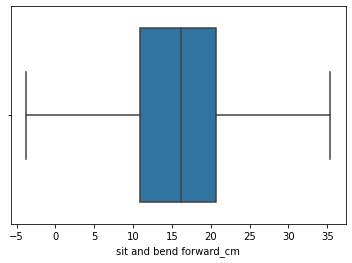

In [58]:
sns.boxplot(new_df['sit and bend forward_cm'])

Model Building

In [59]:
X =new_df.drop('class',axis=1)
Y=new_df['class']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [61]:
X_train.shape,X_test.shape

((9375, 12), (4018, 12))

In [62]:
def model_acc(model):
    model.fit(X_train,Y_train)
    acc=model.score(X_test,Y_test)
    print(str(model)+ '-->'+str(acc))

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
model_acc(nb_clf)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
model_acc(knn_clf)

from sklearn import ensemble
gb_clf = ensemble.GradientBoostingClassifier()
model_acc(gb_clf)

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
model_acc(lr_clf)

RandomForestClassifier()-->0.7334494773519163
GaussianNB()-->0.5724240915878547
KNeighborsClassifier()-->0.5632155301144848
GradientBoostingClassifier()-->0.733947237431558
LogisticRegression()-->0.616973618715779


C:\Users\acer1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters = {'n_estimators':[10, 50,100],'criterion':['gini','entropy']}
grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)
grid_fit = grid_obj.fit(X_train,Y_train)
best_model = grid_fit.best_estimator_
best_model

RandomForestClassifier(criterion='entropy')

In [66]:
best_model.score(X_train,Y_train)

1.0

In [67]:
import pickle
with open('bodyperformance.pkl','wb') as file:
    pickle.dump(grid_fit, file)

In [68]:
X_train.columns

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'F', 'M'],
      dtype='object')

In [69]:
best_model.predict([[28,173.8,67.70,17.1,70.0,127,43.5,27.1,45,217,0,1]])

array([2], dtype=int64)